# Supervised learning: simple models

### Outline <a name = 'outline'></a>
* [Data generation](#datasets) 
    * [Make datasets](#makedata)
    * [Load toy dadasets](#loaddata)
    * [Fetch real world datasets](#fetchdata)
    * [Generate fake datasets](#fakedata)
    * [Read data from files](#readdata)
* [Decision stump & decision trees](#trees)
* [Distance-based models](#knn)
* [Naive Baiyes model](#baiyes)

In [147]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.pyplot.style.use('ggplot')

import pandas as pd
import numpy as np
import seaborn as sns
import pydotplus 

from faker import Faker
from IPython.display import Image
from sklearn import datasets, metrics, model_selection, naive_bayes, neighbors, tree, ensemble

In [6]:
%matplotlib inline

## Data generation<a name = 'datasets'> </a>

### Sklearn datasets
documentation: http://scikit-learn.org/stable/datasets/

[**Functions for generation of classsification or regression problem**](#makedata)
* make_classification
* make_regression
* make_circles
* make_checkerboard
* etc

In [50]:
circles = datasets.make_circles()

In [51]:
type(circles)

tuple

In [52]:
print(f'target: {circles[1][:10]}')
print(f'features: {circles[0][:10]}')

target: [1 1 1 0 1 0 0 1 0 1]
features: [[-0.42866144 -0.67546234]
 [ 0.5831749  -0.54763768]
 [ 0.70104534  0.38540294]
 [-0.63742399  0.77051324]
 [-0.6472136   0.4702282 ]
 [-0.92977649  0.36812455]
 [-0.53582679 -0.84432793]
 [-0.79369176  0.10026659]
 [ 0.80901699  0.58778525]
 [ 0.34062343 -0.72386164]]


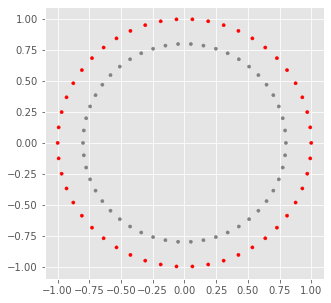

In [53]:
data_tuple = circles

plt.figure(figsize = (5, 5))

plt.scatter(data_tuple[0][:,0], 
            data_tuple[0][:,1], 
            c = data_tuple[1], 
            cmap = matplotlib.colors.ListedColormap(['red', 'grey']),
           s = 10)

plt.show()

In [54]:
noisy_circles = datasets.make_circles(noise = 0.005)

In [55]:
def plot_2d_dataset(data_tuple:tuple, size:tuple = (5,5), 
                    colors:list = ['red', 'black']):
    """Function to generate 2d plot for plain datasets"""
    
    #set size
    plt.figure(figsize = (5, 5))
    
    #build figure
    plt.scatter(data_tuple[0][:,0], 
                data_tuple[0][:,1], 
                c = data_tuple[1], 
                cmap = matplotlib.colors.ListedColormap(colors))
    
    #show figure
    plt.show()

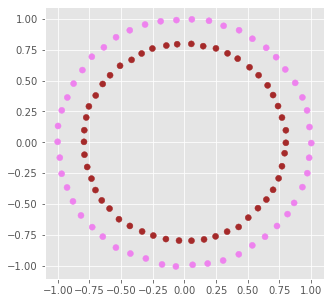

In [56]:
plot_2d_dataset(noisy_circles, colors = ['violet', 'brown'])

[back to outline](#outline)

[**Functions for toy datasets loading **](#loaddata)
* load_iris
* load_boston
* load_diabetes
* load_digits
* load_linnerud
* etc

**Iris Plants Data Set**

In [57]:
iris = datasets.load_iris()

In [58]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [59]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [61]:
print(f'target names: {iris.target_names}\n')
print(f'feature names: {iris.feature_names}')

target names: ['setosa' 'versicolor' 'virginica']

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [62]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [66]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Handwritten Digits Data Set**

In [67]:
digits = datasets.load_digits()

In [68]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [69]:
print(f'example of target: {digits.target[0]}')
print(f'example of features: {digits.data[0]}')

example of target: 0
example of features: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


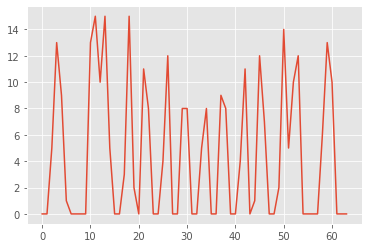

In [70]:
plt.plot(digits.data[0])
plt.show()

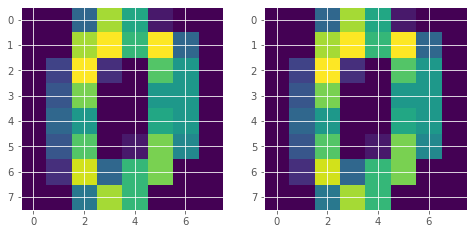

In [71]:
plt.figure(figsize = (8, 8))

plt.subplot(1, 2, 1)
plt.imshow(digits.data[0].reshape(8,8))

plt.subplot(1, 2, 2)
plt.imshow(digits.images[0])

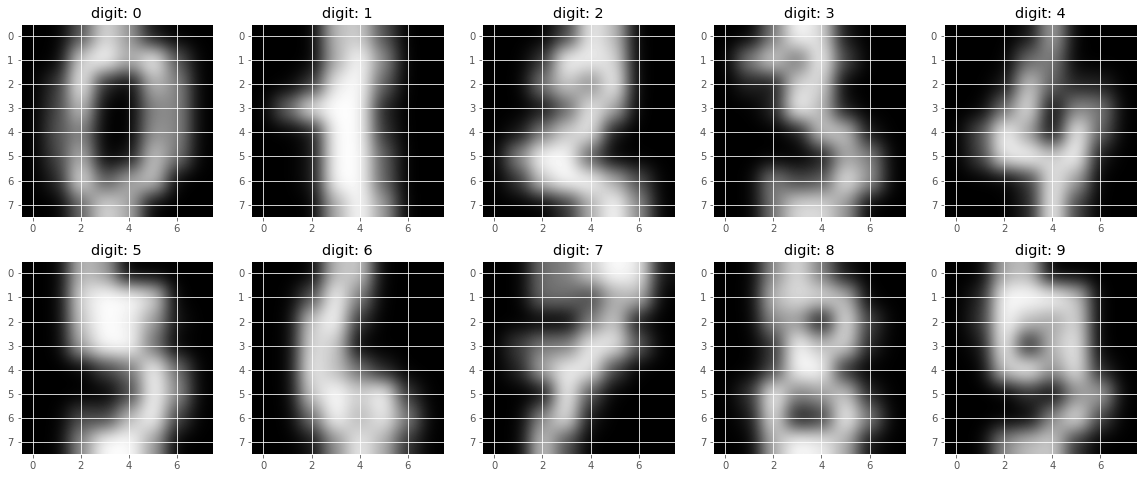

In [86]:
plt.figure(figsize = (20, 8))

for plot_number, plot in enumerate(digits.images[:10]):
    plt.subplot(2, 5, plot_number + 1)
    plt.imshow(plot, cmap = 'gray', interpolation = 'gaussian')
    plt.title('digit: ' + str(digits.target[plot_number]))

[back to outline](#outline)

[**Functions for larger real world datasets loading **](#fetchdata)
* fetch_mldata
* fetch_kddcup99
* fetch_20newsgroups
* fetch_california_housing
* fetch_lfw_people
* etc

In [87]:
news_groups = datasets.fetch_20newsgroups(subset = 'test', random_state = 0)

In [88]:
news_groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [89]:
print(f'Target names: {news_groups.target_names}')

Target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [90]:
print(f'example of target: {news_groups.target_names[news_groups.target[0]]}')
print(f'example of data piece: {news_groups.data[0]}')

example of target: rec.autos
example of data piece: From: mliggett@silver.ucs.indiana.edu (matthew liggett)
Subject: Re: V4 V6 V8 V12 Vx?
Nntp-Posting-Host: silver.ucs.indiana.edu
Organization: Indiana University
Lines: 32

In <1993Apr23.132214.6755@cs.tulane.edu> finnegan@nrlssc.navy.mil writes:

>In article <Apr22.202724.24131@engr.washington.edu>
>eliot@stalfos.engr.washington.edu (eliot) writes:
>>
>>the subarus all use 180 degree vees in their engines..  :-)
>>
>>
>>eliot

>Wouldn't that make them an I4?  Or would they 
>really be an _4 (henceforth referred to as
>"underscore 4")?

horizontally opposed 4.
or 'boxer'
great idea, actually..
smooth running; low center of gravity..
also used in some honda gullwings, corvairs, porsches (others?)
...

>Kenneth
>finnegan@nrlssc.navy.mil




-- 
/-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-\
| |\/|  __   -=> mliggett@silver.ucs.indiana.edu <=- (mliggett@iugold.bitnet  |
* |  |/\||   'junk' collector, toys 

[back to outline](#outline)

[**Fake data generation**](#fakedata)

In [91]:
fake_generator = Faker()

In [106]:
fake_generator.pydict(nb_elements = 10)

{'one': datetime.datetime(1987, 7, 16, 20, 13, 17),
 'huge': Decimal('988755.769656576'),
 'around': datetime.datetime(1990, 6, 15, 16, 22, 33),
 'wear': 'https://duran.net/wp-content/tags/main/',
 'fall': -30.63892251247,
 'piece': 'olowe@gmail.com'}

In [111]:
fake_generator.pylist(nb_elements = 3)

['yFVGnsqyHpIPnVOXINky',
 'kkIjChEcSGhkWOvTPoja',
 datetime.datetime(2002, 5, 11, 4, 51)]

In [116]:
fake_generator.pystr()

'AJlQrrdZkznXBSqGWWCA'

In [117]:
#fake dataset with user data
pd.DataFrame([fake_generator.simple_profile() for profile_num in range(10)])

,username,name,sex,address,mail,birthdate
0,reneecole,Curtis Hawkins,M,"77284 Rhodes Circle\nPort Jennifer, TN 57141",xflynn@hotmail.com,1959-03-21
1,sparker,William Floyd,M,"187 Timothy Corner Suite 915\nYoungport, IL 90949",jeremiah85@gmail.com,2004-02-23
2,jenniferreynolds,Kimberly Paul,F,"560 Tate Freeway\nHarrisberg, OK 59371",cgomez@yahoo.com,1950-12-19
3,melissa44,Nathan Benson,M,"495 Smith Vista\nPort Maria, DC 62813",millerlori@gmail.com,1950-08-14
4,hatfieldamy,Sara Hawkins,F,"089 Erik Glens Suite 611\nJacobhaven, NV 40822",annevalencia@gmail.com,1955-04-13
5,derek30,Linda Payne,F,"72321 Kane Circle\nEvansburgh, TX 12108",mgonzales@gmail.com,1938-11-15
6,joshualopez,Melissa Myers,F,"273 Gutierrez Mount Suite 248\nSouth Wendy, TX...",whall@hotmail.com,1906-02-01
7,watkinsmelinda,Leslie Kelley,F,"766 Nelson Trace\nSouth Tinafurt, TX 11556",genglish@hotmail.com,1908-04-10
8,kim11,Becky Murray,F,"8408 Sara Court\nOwentown, WI 42135",olowe@yahoo.com,2004-04-02
9,dmartin,Taylor Mendez,M,"403 Schmidt Island\nJuliemouth, OK 16024",cruiz@yahoo.com,1931-04-13


In [118]:
print(f'Female name: {fake_generator.name_female()}')
print(f'Male name: {fake_generator.name_male()}')
print(f'Company: {fake_generator.bs()}')
print(f'Country: {fake_generator.country()}')
print(f'City: {fake_generator.city()}')
print(f'Email: {fake_generator.company_email()}')
print(f'Android platform token: {fake_generator.android_platform_token()}')
print(f'Geo coordinates: {fake_generator.latlng()}')

Female name: Claudia Peterson
Male name: Steven Brewer III
Company: visualize magnetic paradigms
Country: China
City: Lake Natalie
Email: belljames@choi-newton.com
Android platform token: Android 8.1.0
Geo coordinates: (Decimal('18.9162265'), Decimal('37.082340'))


In [119]:
ru_fake_generator = Faker(['ru_Ru'])

In [122]:
print(f'Female name: {ru_fake_generator.name_female()}')
print(f'Male name: {ru_fake_generator.name_male()}')
print(f'Company: {ru_fake_generator.bs()}')
print(f'Country: {ru_fake_generator.country()}')
print(f'City: {ru_fake_generator.city()}')
print(f'Email: {ru_fake_generator.company_email()}')
print(f'Android platform token: {ru_fake_generator.android_platform_token()}')
print(f'Geo coordinates: {ru_fake_generator.latlng()}')

Female name: Евдокия Владиславовна Кудрявцева
Male name: Дроздов Спиридон Анатольевич
Company: Переосмысление распределённых метрик
Country: Сент-Люсия
City: ст. Елец
Email: efim_1998@oao.edu
Android platform token: Android 3.1
Geo coordinates: (Decimal('-78.293894'), Decimal('125.998958'))


In [124]:
#fake dataset with user data
pd.DataFrame([ru_fake_generator.simple_profile() for profile_num in range(10)])

,username,name,sex,address,mail,birthdate
0,karpovvlas,Виктория Алексеевна Матвеева,F,"клх Новосибирск, алл. Театральная, д. 4, 500934",izjaslav2003@gmail.com,1909-11-05
1,shashkovauljana,Ситникова Акулина Архиповна,F,"д. Пенза, ш. Приморское, д. 483 к. 960, 830648",adementeva@rambler.ru,1946-05-27
2,bolshakovgennadi,Семен Феоктистович Калинин,M,"п. Азов (Рост.), ш. Запрудное, д. 579 стр. 833...",bojan87@yandex.ru,2008-05-21
3,nikon77,Евдокия Архиповна Беспалова,F,"п. Воскресенск, наб. Циолковского, д. 2 к. 94,...",gleb1976@yahoo.com,2020-06-08
4,uljan41,Ершова Глафира Болеславовна,F,"п. Дивногорск, алл. Специалистов, д. 3, 963286",feofanmoiseev@mail.ru,1923-01-11
5,tvorimir49,Татьяна Матвеевна Петрова,F,"к. Балтийск, пер. Алтайский, д. 4/6, 643698",larionovvarlaam@rambler.ru,1929-09-07
6,zikovsamuil,Ковалева Иванна Егоровна,F,"с. Моздок, ул. Комсомольская, д. 706 к. 495, 1...",amos13@hotmail.com,1942-04-10
7,frolpetuhov,Ксения Тимофеевна Мясникова,F,"п. Токма, пр. Санаторный, д. 5/2 к. 42, 565456",mina12@gmail.com,1938-06-14
8,ivanovamarija,Сильвестр Герасимович Антонов,M,"с. Красноуральск, алл. Кленовая, д. 13 стр. 8,...",kulakovflorentin@mail.ru,1935-05-07
9,antonin_44,Петр Данилович Дьячков,M,"п. Костомукша, наб. Набережная, д. 90 стр. 2/9...",jakov99@rambler.ru,1949-10-04


[back to outline](#outline)

[**Reading data from local files**](#readdata)

In [126]:
bikes = pd.read_csv('bikes_demand_prediction.csv', header =  0, sep = ',')

In [127]:
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [128]:
bikes.loc[5:15, ['datetime', 'count']]

,datetime,count
5,2011-01-01 05:00:00,1
6,2011-01-01 06:00:00,2
7,2011-01-01 07:00:00,3
8,2011-01-01 08:00:00,8
9,2011-01-01 09:00:00,14
10,2011-01-01 10:00:00,36
11,2011-01-01 11:00:00,56
12,2011-01-01 12:00:00,84
13,2011-01-01 13:00:00,94
14,2011-01-01 14:00:00,106


In [129]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [130]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


[back to outline](#outline)

## Decision stump & decision trees <a name = 'trees'></a>

In [140]:
#data generation
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant = 0, 
                                                      n_clusters_per_class = 1, 
                                                      random_state = 0)

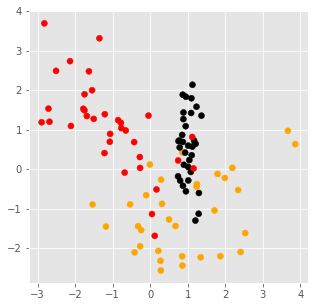

In [141]:
plot_2d_dataset(classification_problem, colors = ['red', 'black', 'orange'])

In [142]:
#data train/test split
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    classification_problem[0], 
    classification_problem[1],
    test_size = 0.3,
    random_state = 0)

In [154]:
#model training
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [155]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.6666666666666666

In [156]:
#helper functions for separating surface visualization

colors = matplotlib.colors.ListedColormap(['red', 'black', 'orange'])
light_colors = matplotlib.colors.ListedColormap(['lightcoral', 'silver', 'bisque'])

def get_meshgrid(data, step = .05, border = .5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))


def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(
        estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    
    plt.pcolormesh(xx, 
                      yy, 
                      mesh_predictions, 
                      cmap = light_colors)
    
    plt.scatter(train_data[:, 0], 
                   train_data[:, 1], 
                   c = train_labels, 
                   s = 100, 
                   cmap = colors)
    
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(
        train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    #xx, yy = get_meshgrid(test_data)
    #mesh_predictions = np.array(
    #    estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, 
                   yy, 
                   mesh_predictions, 
                   cmap = light_colors)
    
    plt.scatter(test_data[:, 0], 
                test_data[:, 1], 
                c = test_labels, 
                s = 100, 
                cmap = colors)
    
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(
        test_labels, estimator.predict(test_data))))

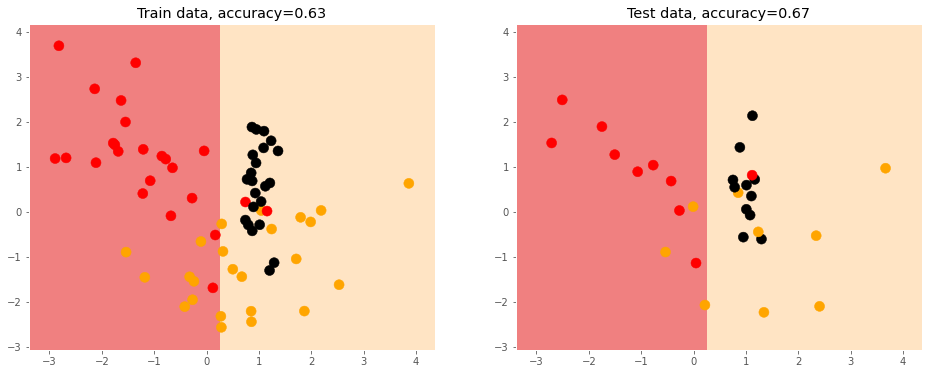

In [168]:
estimator = tree.DecisionTreeClassifier(random_state = 0, max_depth = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [169]:
dot_data = tree.export_graphviz(estimator, out_file="small_tree.out", 
                         feature_names=['x', 'y'],  
                         class_names=['red', 'black', 'orange'],  
                         filled=True, rounded=True,  
                         special_characters=True)

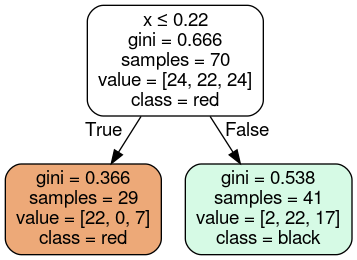

In [170]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())

[back to outline](#outline)

## Distance-based models <a name = 'knn'></a>

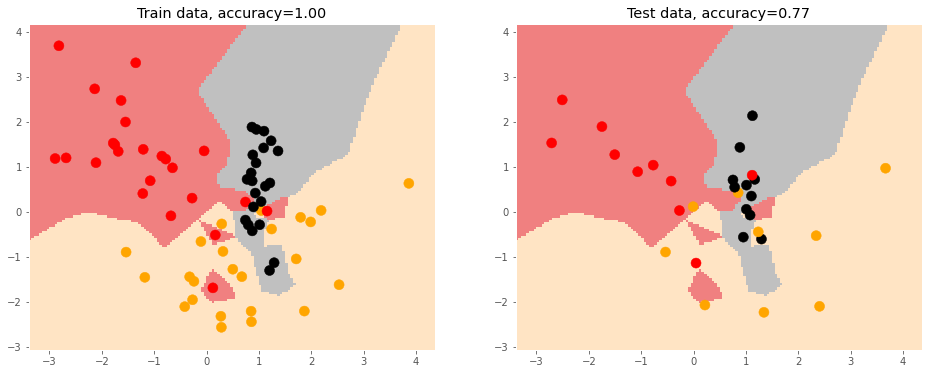

In [176]:
estimator = neighbors.KNeighborsClassifier(n_neighbors = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

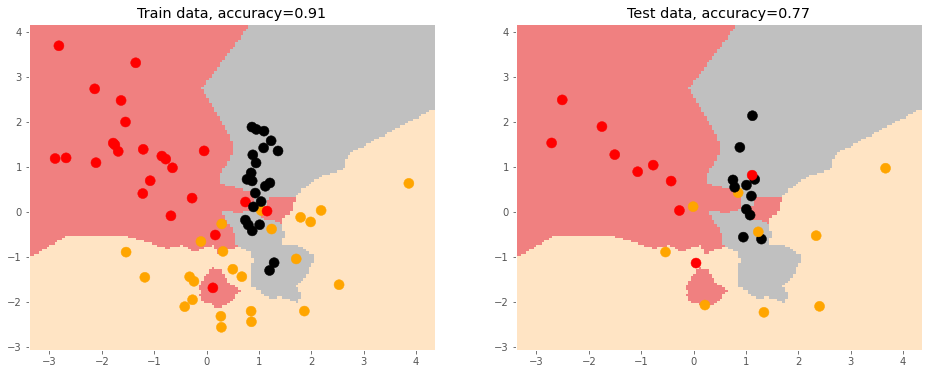

In [177]:
estimator = neighbors.KNeighborsClassifier(n_neighbors = 2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

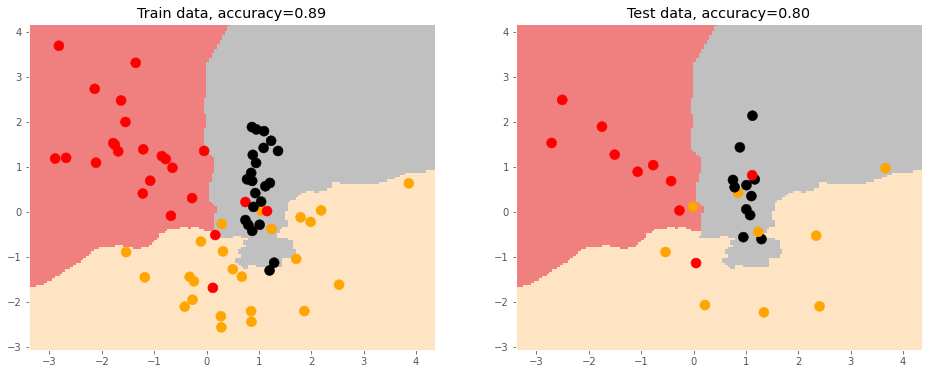

In [178]:
estimator = neighbors.KNeighborsClassifier(n_neighbors = 10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

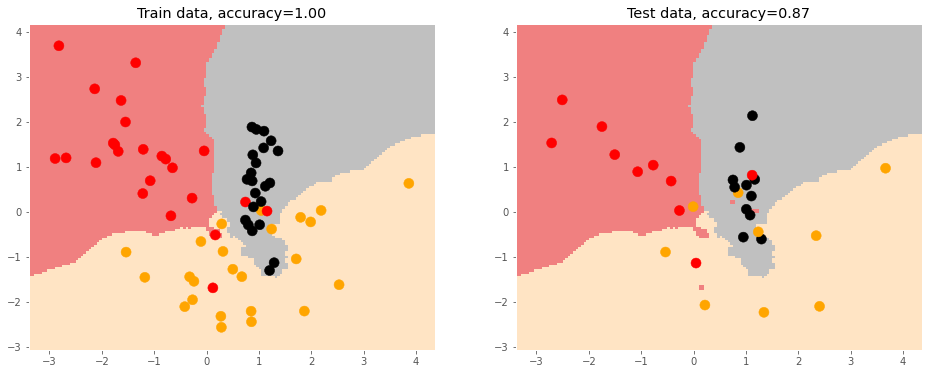

In [181]:
estimator = neighbors.KNeighborsClassifier(n_neighbors = 10, weights = 'distance')

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

[back to outline](#outline)

## Naive Baiyes model <a name = 'baiyes'></a>

In [182]:
estimator = naive_bayes.GaussianNB()
estimator.fit(train_data, train_labels)

GaussianNB()

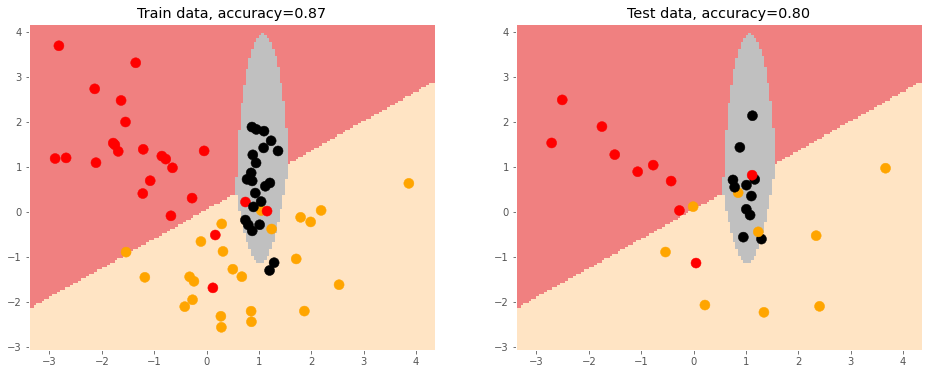

In [183]:
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [184]:
estimator.theta_

array([[-1.12548408,  1.14728805],
       [ 1.00154542,  0.58396415],
       [ 0.7580685 , -1.18192183]])

In [185]:
estimator.sigma_

array([[1.10302786, 1.3564884 ],
       [0.02990074, 0.81074094],
       [1.46716917, 0.79664852]])

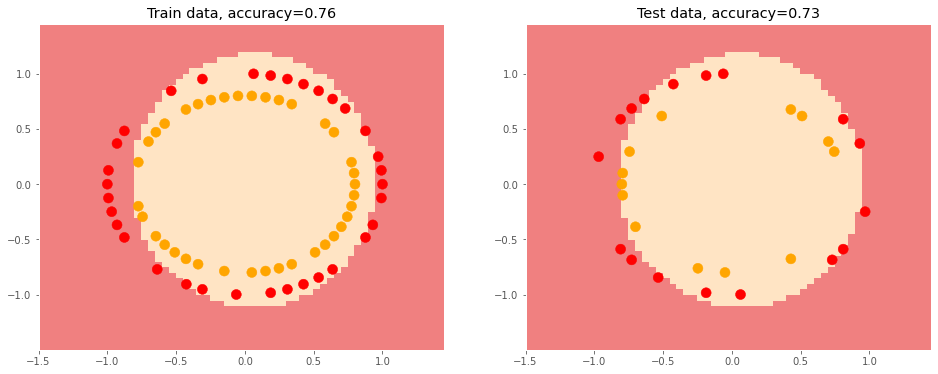

In [186]:
estimator = naive_bayes.GaussianNB()#priors = [0.5, 0.5])

train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    circles[0], 
    circles[1],
    test_size = 0.3,
    random_state = 0)  

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

[back to outline](#outline)

## Takeaways
* There are many different ways to generate data. In the absence of a suitable dataset, it can be generated independently using the suitable tool.
* Most supervised learning algorithms are based on simple mathematical principles and basic logic. Easy to learn on your own =)
* Each algorithm has its own area of application, its advantages and disadvantages. Simple algorithms have a very limited scope. It is important to understand for what task you are using the selected approaches.
* Assessing an applicability of an algorithm for a specific task is not limited to assessing the accuracy or error of the model. It is important to investigate the properties of the resulting model as well.